## Load and Preprocess Data

In [22]:
import pandas as pd
df=pd.read_csv("online_retail.csv") 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [24]:
df.shape

(541909, 8)

In [25]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [26]:
df=df[df["CustomerID"].notnull()] # Remove row where customer id is null

In [27]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [28]:
df=df.drop(['Description', 'StockCode', 'Country'],axis=1) # Drop unecessary Columns

In [29]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [30]:
df = df.drop_duplicates(subset=['CustomerID', 'InvoiceNo'])


In [31]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
7,536366,6,2010-12-01 08:28:00,1.85,17850.0
9,536367,32,2010-12-01 08:34:00,1.69,13047.0
21,536368,6,2010-12-01 08:34:00,4.25,13047.0
25,536369,3,2010-12-01 08:35:00,5.95,13047.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22190 entries, 0 to 541894
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    22190 non-null  object 
 1   Quantity     22190 non-null  int64  
 2   InvoiceDate  22190 non-null  object 
 3   UnitPrice    22190 non-null  float64
 4   CustomerID   22190 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
# Change data type of some columns 
df["CustomerID"]=df["CustomerID"].astype(int)
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22190 entries, 0 to 541894
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   Quantity     22190 non-null  int64         
 2   InvoiceDate  22190 non-null  datetime64[ns]
 3   UnitPrice    22190 non-null  float64       
 4   CustomerID   22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.0+ MB


In [36]:
# Add total price column which is the mutiple of Quantity and unit price
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]

In [37]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
0,536365,6,2010-12-01 08:26:00,2.55,17850,15.30
7,536366,6,2010-12-01 08:28:00,1.85,17850,11.10
9,536367,32,2010-12-01 08:34:00,1.69,13047,54.08
21,536368,6,2010-12-01 08:34:00,4.25,13047,25.50
25,536369,3,2010-12-01 08:35:00,5.95,13047,17.85


In [38]:
df.info(    )

<class 'pandas.core.frame.DataFrame'>
Index: 22190 entries, 0 to 541894
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   Quantity     22190 non-null  int64         
 2   InvoiceDate  22190 non-null  datetime64[ns]
 3   UnitPrice    22190 non-null  float64       
 4   CustomerID   22190 non-null  int64         
 5   TotalPrice   22190 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.2+ MB


In [39]:
df.shape

(22190, 6)

In [40]:
df.tail()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
541865,581583,40,2011-12-09 12:23:00,1.45,13777,58.00
541867,581584,72,2011-12-09 12:25:00,0.72,13777,51.84
541869,581585,12,2011-12-09 12:31:00,0.39,15804,4.68
541890,581586,8,2011-12-09 12:49:00,2.95,13113,23.60
541894,581587,12,2011-12-09 12:50:00,1.95,12680,23.40


# Recency Calculation

In [ ]:

import datetime as dt 
REFERENCE_DATE=dt.datetime(2011, 12, 10)
last_purchase=df.groupby("CustomerID")["InvoiceDate"].max().reset_index()

In [43]:
last_purchase.head()

,CustomerID,InvoiceDate
0,12346,2011-01-18 10:17:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00


In [44]:
last_purchase["Recency"]=(REFERENCE_DATE-last_purchase["InvoiceDate"]).dt.days

In [45]:
last_purchase.head()

,CustomerID,InvoiceDate,Recency
0,12346,2011-01-18 10:17:00,325
1,12347,2011-12-07 15:52:00,2
2,12348,2011-09-25 13:13:00,75
3,12349,2011-11-21 09:51:00,18
4,12350,2011-02-02 16:01:00,310


## Frequencey calculation

In [46]:
frequency=df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()

In [47]:
frequency.head()

,CustomerID,InvoiceNo
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [48]:
frequency.rename(columns={"InvoiceNo":"Frequency"},inplace=True)

In [49]:
frequency.head()

,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


## Monetary Calculation

In [50]:
monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)


In [51]:
monetary.head()

,CustomerID,Monetary
0,12346,0.00
1,12347,163.16
2,12348,331.36
3,12349,15.00
4,12350,25.20


In [56]:
rf=pd.merge(last_purchase[["CustomerID","Recency"]],frequency,on="CustomerID")

In [57]:
rf.head()

,CustomerID,Recency,Frequency
0,12346,325,2
1,12347,2,7
2,12348,75,4
3,12349,18,1
4,12350,310,1


In [59]:
rfm=pd.merge(rf,monetary,on="CustomerID")

In [60]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,2,0.00
1,12347,2,7,163.16
2,12348,75,4,331.36
3,12349,18,1,15.00
4,12350,310,1,25.20


In [61]:
rfm.shape

(4372, 4)

In [66]:
rfm["R_Score"]=pd.qcut(rfm["Recency"],4,labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"),  q=4, labels=[1,2,3,4])
rfm["M_Score"]=pd.qcut(rfm["Monetary"],4,labels=[1,2,3,4])

In [67]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346,325,2,0.00,1,2,1
1,12347,2,7,163.16,4,4,4
2,12348,75,4,331.36,2,3,4
3,12349,18,1,15.00,3,1,1
4,12350,310,1,25.20,1,1,2


In [68]:
rfm["RFM_Score"]=rfm["R_Score"].astype(int)+rfm["F_Score"].astype(int)+rfm["M_Score"].astype(int)

In [69]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,325,2,0.00,1,2,1,4
1,12347,2,7,163.16,4,4,4,12
2,12348,75,4,331.36,2,3,4,9
3,12349,18,1,15.00,3,1,1,5
4,12350,310,1,25.20,1,1,2,4


In [71]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary,RFM_Score
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.581199,5.075480,188.430071,7.506633
std,1722.390705,100.772139,9.338754,1046.488801,2.703227
min,12346.000000,0.000000,1.000000,-7899.590000,3.000000
25%,13812.750000,16.000000,1.000000,15.000000,5.000000
50%,15300.500000,50.000000,3.000000,39.500000,7.000000
75%,16778.250000,143.000000,5.000000,110.082500,10.000000
max,18287.000000,373.000000,248.000000,38834.790000,12.000000


# Segmentation

In [72]:
def segment_customer(score):
    if 10 <= score <= 12:
        return "Champions"
    elif 7 <= score <= 9:
        return "Loyal Customers"
    elif 5 <= score <= 6:
        return "Potential Customers"
    else:  # 3–4
        return "At Risk"

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)


In [79]:
rfm.head(20)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,325,2,0.00,1,2,1,4,At Risk
1,12347,2,7,163.16,4,4,4,12,Champions
2,12348,75,4,331.36,2,3,4,9,Loyal Customers
3,12349,18,1,15.00,3,1,1,5,Potential Customers
4,12350,310,1,25.20,1,1,2,4,At Risk
5,12352,36,11,-140.05,3,4,1,8,Loyal Customers
6,12353,204,1,19.90,1,1,2,4,At Risk
7,12354,232,1,20.80,1,1,2,4,At Risk
8,12355,214,1,30.00,1,1,2,4,At Risk
9,12356,22,3,153.90,3,2,4,9,Loyal Customers


In [ ]:
rfm.loc[rfm['Monetary'] <= 0, 'Segment'] = "Returned/Churned"

In [81]:
rfm.head(20)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,325,2,0.00,1,2,1,4,Returned/Churned
1,12347,2,7,163.16,4,4,4,12,Champions
2,12348,75,4,331.36,2,3,4,9,Loyal Customers
3,12349,18,1,15.00,3,1,1,5,Potential Customers
4,12350,310,1,25.20,1,1,2,4,At Risk
5,12352,36,11,-140.05,3,4,1,8,Returned/Churned
6,12353,204,1,19.90,1,1,2,4,At Risk
7,12354,232,1,20.80,1,1,2,4,At Risk
8,12355,214,1,30.00,1,1,2,4,At Risk
9,12356,22,3,153.90,3,2,4,9,Loyal Customers


# Visualization

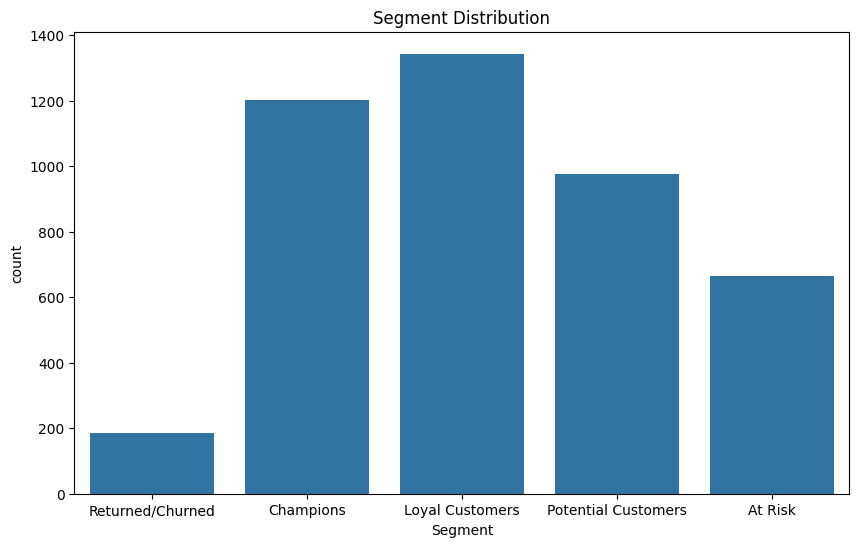

In [92]:
import seaborn as sns 
import matplotlib.pyplot as pyt 
pyt.figure(figsize=(10,6))
sns.countplot(x="Segment",data=rfm)
pyt.title("Segment Distribution")
pyt.show()

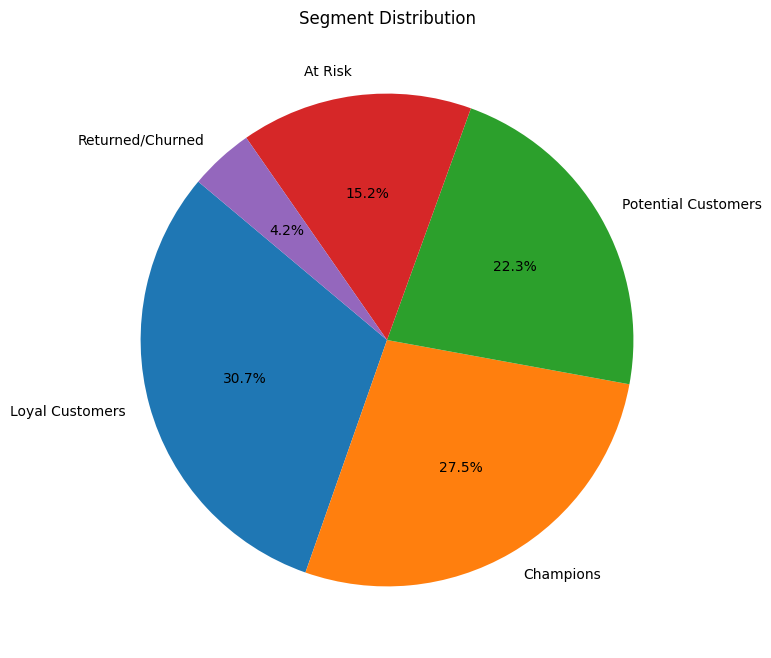

In [ ]:

counts = rfm['Segment'].value_counts()
pyt.figure(figsize=(8,8))
pyt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
pyt.title("Segment Distribution")
pyt.show()


In [93]:
rfm.to_csv("RFM_Segmentation.csv", index=False)
df.to_csv("Clean.csv", index=False)